# Confidence Interval Simulation

This notebook works through a simulation on confidence intervals, letting us see firsthand where the randomness is coming from. 

## Preamble

First we load some useful packages and set the seed for our random number generator (this chooses a starting point, allowing us all the get the same results when starting with the same seed). 

In [57]:
set.seed(3482)
library(tidyverse)

## Simulating A Sample of size n=50

Here we begin by taking a sample of size 50 for $X \sim N(4,4)$ and construct a confidence interval. 

In [100]:
# One sample CI
n <- 50
# sample of 50 obs drawn from an N(4,4) distribution
sample <- rnorm(n,mean = 4,sd = 2)

# get the mean and sample standard deviation
m <- mean(sample)
s <- sd(sample)

# Calculate lower and upper bounds for a 95% confidence interval
ci_low <- m - 1.96*s/sqrt(n)
ci_upper <- m + 1.96*s/sqrt(n) 

one_sim <- data.frame(Mean = m,
                  Standard.Deviation = s,
                  CI_Lower = ci_low,
                  CI_Upper = ci_upper)
one_sim

Mean,Standard.Deviation,CI_Lower,CI_Upper
<dbl>,<dbl>,<dbl>,<dbl>
4.165403,1.720073,3.688623,4.642183


## Simulating 1,000 samples of size n = 50

Here we build a function to draw 1,000 samples of size 50 and construct a 95\% confidence interval for all samples.


In [70]:
# Function to perform multiple draws
simulate_samples <- function(nobs, nsim){
  res <- data.frame(index = 1:nsim,
                    m = 1:nsim,
                    s = 1:nsim)
  for(i in 1:nsim){
    sample <- rnorm(nobs,mean = 4,sd = 2)
    res$m[i] <- mean(sample)
    res$s[i] <- sd(sample)
    
  }
  return(res)
}

samples <- simulate_samples(nobs = n, nsim = 1000)
head(samples)
tail(samples)

index,m,s
<int>,<dbl>,<dbl>
1,4.258475,1.916710
2,3.716364,2.039295
3,3.866944,2.035618
4,3.941090,2.090810
5,3.885910,2.079897
6,3.897457,1.795081


,index,m,s
,<int>,<dbl>,<dbl>
995,995,4.743313,2.409120
996,996,4.125360,1.687046
997,997,3.879520,1.876534
998,998,3.444724,2.274503
999,999,4.157866,2.077349
1000,1000,4.265871,1.924503


We now have 1,000 different samples, each with their own sample mean and sample standart deviation. We can now construct a confidence interval for all these samples.

In [71]:
samples <- samples %>%
    mutate(ci_low = m - 1.96*s/sqrt(n),
           ci_upper = m + 1.96*s/sqrt(n))
head(samples)
tail(samples)

index,m,s,ci_low,ci_upper
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.258475,1.916710,3.727190,4.789760
2,3.716364,2.039295,3.151100,4.281627
3,3.866944,2.035618,3.302700,4.431189
4,3.941090,2.090810,3.361547,4.520633
5,3.885910,2.079897,3.309392,4.462428
6,3.897457,1.795081,3.399886,4.395028


,index,m,s,ci_low,ci_upper
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
995,995,4.743313,2.409120,4.075539,5.411087
996,996,4.125360,1.687046,3.657735,4.592986
997,997,3.879520,1.876534,3.359371,4.399668
998,998,3.444724,2.274503,2.814264,4.075184
999,999,4.157866,2.077349,3.582054,4.733677
1000,1000,4.265871,1.924503,3.732426,4.799316


## Failures of our Confidence Intervals

Now let's check to see how many of these confidence intervals __do not__ include our true population mean, $\mu = 4$. We'll do this by creating binary variables that equal to one if the lower bound is greater than 4, or if the upper bound is less than 4. 

To get a sense of how often the confidence interval doesn't contain the true mean of 4, we can sum up the positive values for our $bad_lower$ and $bad_upper$ variables and divide by the number of simulations.

In [74]:
samples <- samples %>%
    mutate(bad_lower = (4 < ci_low),
           bad_upper = (ci_upper < 4))
head(samples)
tail(samples)

bad_frac <- (sum(samples$bad_lower) + sum(samples$bad_upper))/ 1000
bad_frac 

index,m,s,ci_low,ci_upper,bad_lower,bad_upper
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
1,4.258475,1.916710,3.727190,4.789760,FALSE,FALSE
2,3.716364,2.039295,3.151100,4.281627,FALSE,FALSE
3,3.866944,2.035618,3.302700,4.431189,FALSE,FALSE
4,3.941090,2.090810,3.361547,4.520633,FALSE,FALSE
5,3.885910,2.079897,3.309392,4.462428,FALSE,FALSE
6,3.897457,1.795081,3.399886,4.395028,FALSE,FALSE


,index,m,s,ci_low,ci_upper,bad_lower,bad_upper
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
995,995,4.743313,2.409120,4.075539,5.411087,TRUE,FALSE
996,996,4.125360,1.687046,3.657735,4.592986,FALSE,FALSE
997,997,3.879520,1.876534,3.359371,4.399668,FALSE,FALSE
998,998,3.444724,2.274503,2.814264,4.075184,FALSE,FALSE
999,999,4.157866,2.077349,3.582054,4.733677,FALSE,FALSE
1000,1000,4.265871,1.924503,3.732426,4.799316,FALSE,FALSE


[1] 0.052

And we see that the 95% confidence intervals for our simulations do not contain the true population mean in 5.2\% of the samples, almost exactly equal to 5%! 

## Plotting the Distribution of $\bar{X}$

The below plot shows our distribution for $\bar{X}$. The red lines represent the upper and lower bounds for a 95% confidence interval using the true _population_ standard deviation. Since we generated our samples from an $N(4,4)$ distribution, we know that $\sigma = 2$ and can calculate the confidence interval as

$$ \text{95% True Confidence Interval} ~=~ \left[\bar{x} - 1.96 \cdot \frac{\sigma}{\sqrt{n}},~ \bar{x} + 1.96 \cdot \frac{\sigma}{\sqrt{n}}\right]$$

$$ \text{95% True Confidence Interval} ~=~ \left[\bar{x} - 1.96 \cdot \frac{2}{\sqrt{50}},~ \bar{x} + 1.96 \cdot \frac{2}{\sqrt{50}}\right]$$

$$ \text{95% True Confidence Interval} ~=~ \left[3.4456, 4.5544 \right]$$

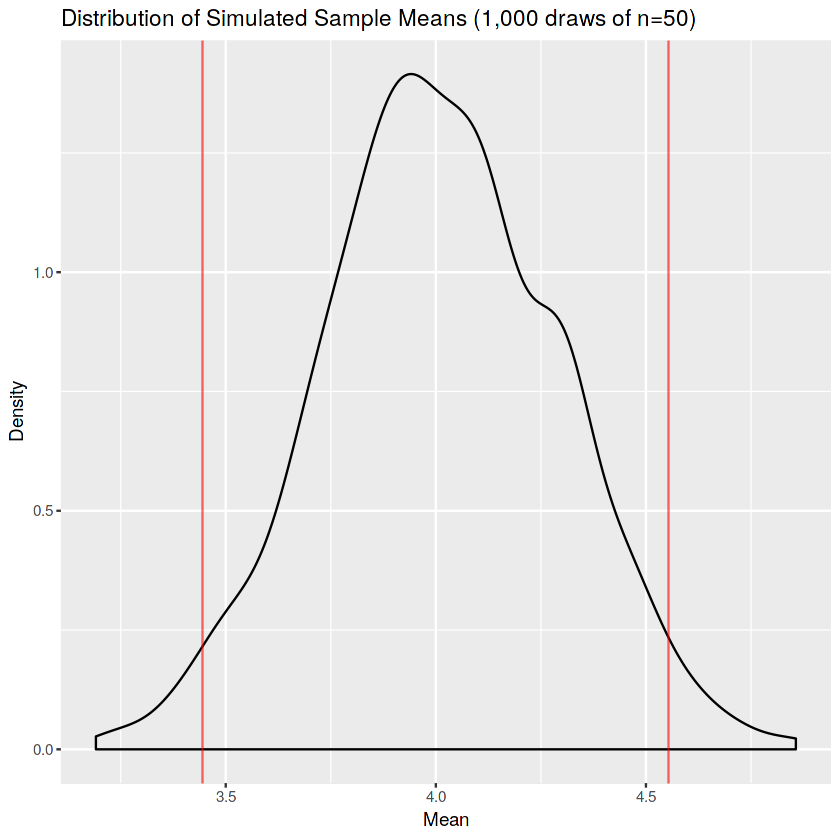

In [111]:
true_low <- 4-1.96*2/sqrt(n)
true_upper <- 4+1.96*2/sqrt(n)

ggplot(samples, aes(m)) +
  geom_density() +
  geom_vline(xintercept = true_low, colour = "red", alpha = 0.6) +
  geom_vline(xintercept = true_upper, colour = "red", alpha = 0.6) + 
  labs( title = "Distribution of Simulated Sample Means (1,000 draws of n=50)",
        x = "Mean",
        y = "Density")

And we see three things:
1. Our distribution looks very similar to a normal distribution. If we took more draws or increased our sample size, it would likely smooth out even more.
2. The distribution is centered around the true mean $\mu = 4$
3. It seems like a reasonable guess that the lower and upper confidence interval lines look like roughly 0.025 of the distribution's area fall beyond them

## Plotting the Simulated Confidence Intervals

Another thing we expect due to the symmetry of the normal distribution is that our confidence interval failures should be symmetric. That is, $bad\_lower$ and $bad\_upper$ should be about equal in number.

Another way to evaluate this is by plotting the lower versus upper limits and comparing their shape to the horizontal and vertical lines at $\mu =4$. We would like to see a scatterplot that is symmetric around the 45 degree line through the point $(4,4)$.

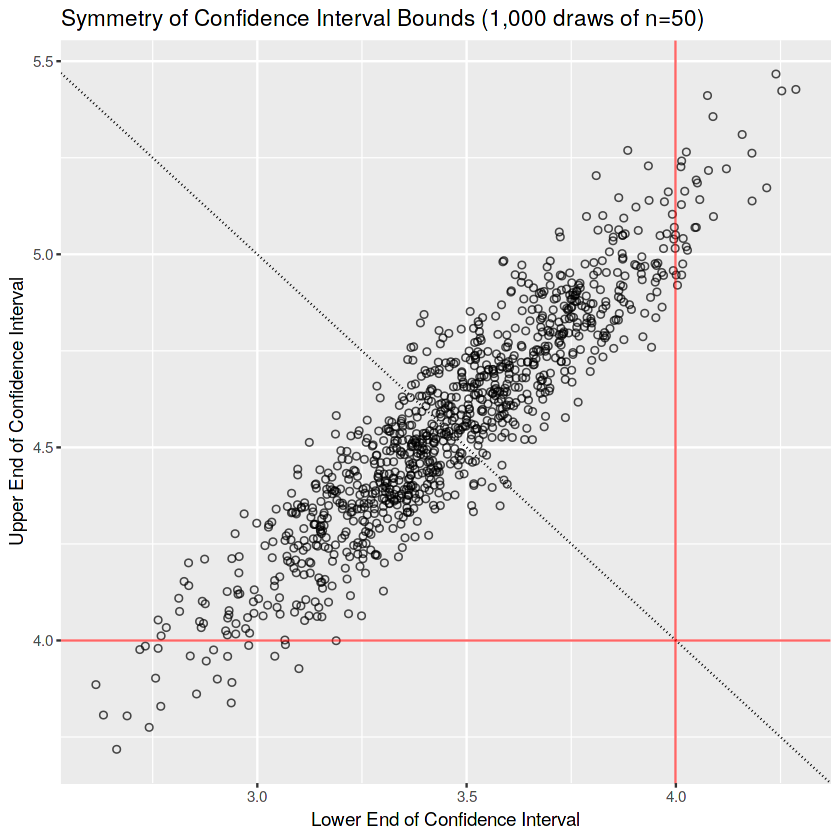

In [113]:
ggplot(samples) +
geom_point(aes(x = ci_low, y = ci_upper), shape = 1, alpha = 0.7) +
geom_abline(intercept = 8, slope = -1, linetype = "dotted") + 
geom_hline(yintercept = 4, colour = "red", alpha = 0.6) +
geom_vline(xintercept = 4, colour = "red", alpha = 0.6) +
labs(x = "Lower End of Confidence Interval",
    y = "Upper End of Confidence Interval",
    title = "Symmetry of Confidence Interval Bounds (1,000 draws of n=50)")




## What Happens When We Increase the Sample Size?

Previously all our samples were of size $n=50$. What if we instead took samples of size $n' = 500$?

In [109]:
nprime <- 500
samples_prime <- simulate_samples(nobs = nprime, nsim = 1000) %>%
    mutate(ci_low = m - 1.96*s/sqrt(nprime),
           ci_upper = m + 1.96*s/sqrt(nprime))

head(samples_prime)
tail(samples_prime)

index,m,s,ci_low,ci_upper
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.986093,1.953152,3.814892,4.157294
2,3.983483,2.081361,3.801043,4.165922
3,4.124351,2.004760,3.948626,4.300076
4,3.971192,1.989678,3.796789,4.145595
5,3.913124,2.025154,3.735612,4.090637
6,3.982914,2.019116,3.805931,4.159898


,index,m,s,ci_low,ci_upper
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
995,995,4.001421,2.159553,3.812128,4.190714
996,996,4.122582,2.015342,3.945930,4.299235
997,997,4.099874,1.927598,3.930912,4.268835
998,998,3.923933,1.931420,3.754636,4.093229
999,999,4.073845,2.035699,3.895408,4.252282
1000,1000,3.967191,2.004587,3.791481,4.142901


First off, we can see that the sample means and standard deviations are much more tightly clustered around the true population mean (4) and standard deviation (2). As a result, our 95% confidence intervals are also much tighter around the true mean.

In [110]:
samples_prime <- samples_prime %>%
    mutate(bad_lower = (4 < ci_low),
           bad_upper = (ci_upper < 4))
head(samples_prime)
tail(samples_prime)

bad_frac_prime <- (sum(samples_prime$bad_lower) + sum(samples_prime$bad_upper))/ 1000
bad_frac_prime 

index,m,s,ci_low,ci_upper,bad_lower,bad_upper
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
1,3.986093,1.953152,3.814892,4.157294,FALSE,FALSE
2,3.983483,2.081361,3.801043,4.165922,FALSE,FALSE
3,4.124351,2.004760,3.948626,4.300076,FALSE,FALSE
4,3.971192,1.989678,3.796789,4.145595,FALSE,FALSE
5,3.913124,2.025154,3.735612,4.090637,FALSE,FALSE
6,3.982914,2.019116,3.805931,4.159898,FALSE,FALSE


,index,m,s,ci_low,ci_upper,bad_lower,bad_upper
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
995,995,4.001421,2.159553,3.812128,4.190714,FALSE,FALSE
996,996,4.122582,2.015342,3.945930,4.299235,FALSE,FALSE
997,997,4.099874,1.927598,3.930912,4.268835,FALSE,FALSE
998,998,3.923933,1.931420,3.754636,4.093229,FALSE,FALSE
999,999,4.073845,2.035699,3.895408,4.252282,FALSE,FALSE
1000,1000,3.967191,2.004587,3.791481,4.142901,FALSE,FALSE


[1] 0.055

And once again we have about 5% of the (now much narrower) confidence intervals not including the true mean $\mu =4$.

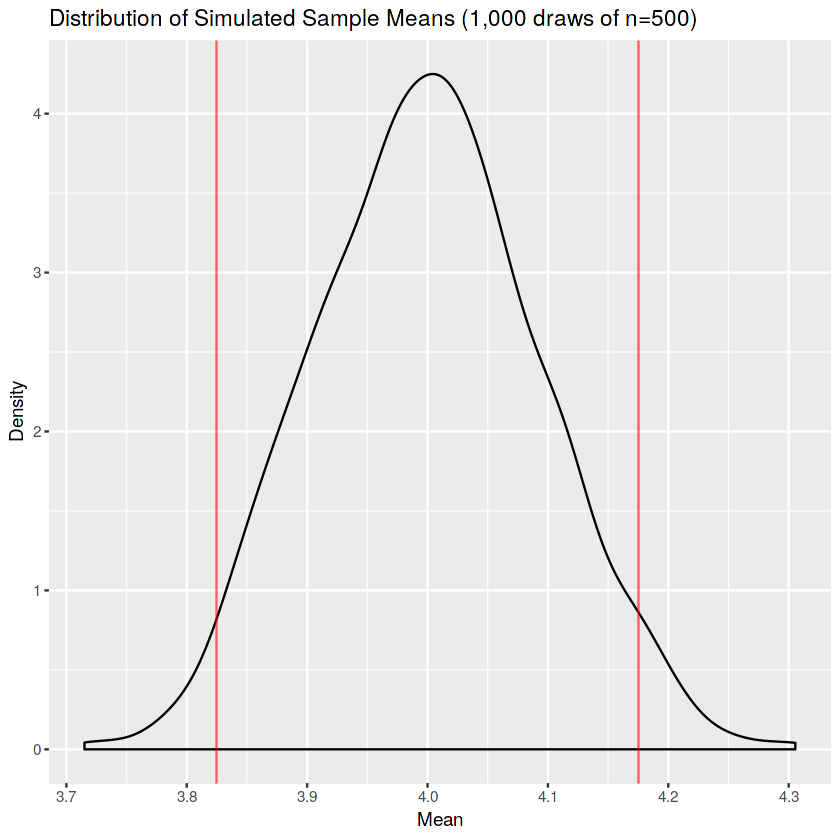

In [115]:
true_low_prime <- 4-1.96*2/sqrt(nprime)
true_upper_prime <- 4+1.96*2/sqrt(nprime)

ggplot(samples_prime, aes(m)) +
  geom_density() +
  geom_vline(xintercept = true_low_prime, colour = "red", alpha = 0.6) +
  geom_vline(xintercept = true_upper_prime, colour = "red", alpha = 0.6) + 
  labs( title = "Distribution of Simulated Sample Means (1,000 draws of n=500)",
        x = "Mean",
        y = "Density")

Our distribution now looks a lot more like a normal distribution, looking much smoother overall. Notice how it is also much more tightly concentrated around the true population mean.

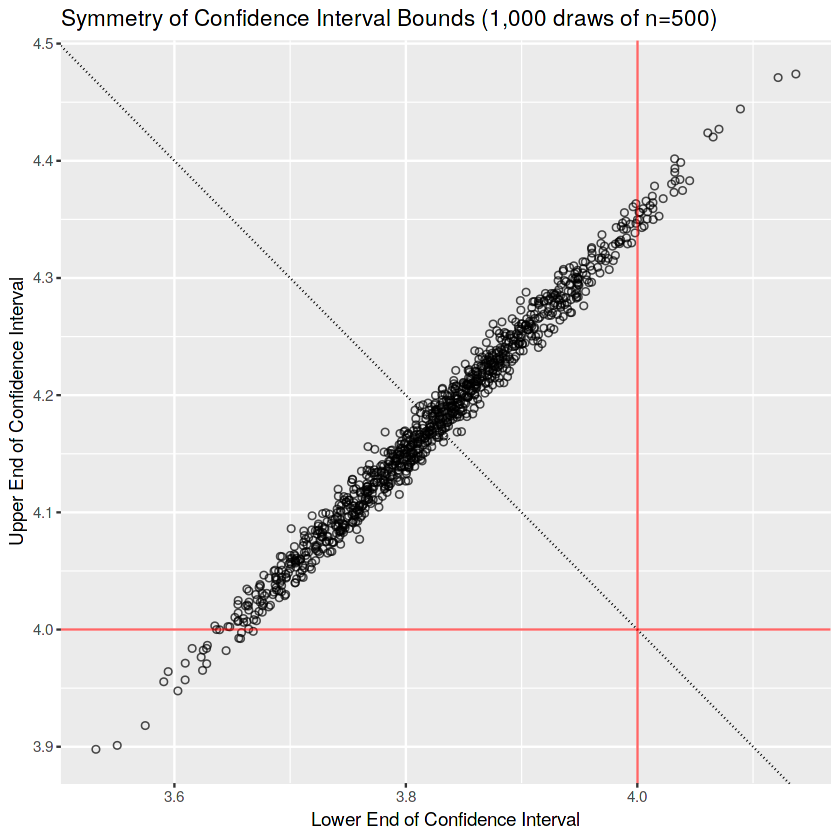

In [114]:
ggplot(samples_prime) +
geom_point(aes(x = ci_low, y = ci_upper), shape = 1, alpha = 0.7) +
geom_abline(intercept = 8, slope = -1, linetype = "dotted") + 
geom_hline(yintercept = 4, colour = "red", alpha = 0.6) +
geom_vline(xintercept = 4, colour = "red", alpha = 0.6) +
labs(x = "Lower End of Confidence Interval",
    y = "Upper End of Confidence Interval",
    title = "Symmetry of Confidence Interval Bounds (1,000 draws of n=500)")


Now we can see that there is overall much less spread between the upper and lower confidence intervals for a given sample, with still roughly 5% that don't fall into the first quadrant and contain the true population mean.